In [193]:
!pip install pandas openpyxl
!pip install --upgrade pip


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
H:\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Define the path to your Excel file
file_path = 'C:/Users/dania/Desktop/python/Data _Analysis/Cricket(Players)/players.csv'


# Read the Excel file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
2,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
3,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1
4,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6


In [6]:
df=df.rename(columns={'Mat':'Matches','NO':'Not_Outs','HS':'Highest_Inns_Score','BF':'Balls_Faced','SR':'Strike_Rate'})

In [7]:
df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
2,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
3,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1
4,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6


In [8]:
df.isnull().any()

Player                False
Span                  False
Matches               False
Inns                  False
Not_Outs              False
Runs                  False
Highest_Inns_Score    False
Ave                   False
Balls_Faced           False
Strike_Rate           False
100                   False
50                    False
0                     False
4s                    False
6s                    False
dtype: bool

In [9]:
df[df['Balls_Faced'].isna()]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s


In [10]:
df['Balls_Faced']=df['Balls_Faced'].fillna(0)


In [11]:
df['Strike_Rate']=df['Strike_Rate'].fillna(0)

In [12]:
df.isnull().any()

Player                False
Span                  False
Matches               False
Inns                  False
Not_Outs              False
Runs                  False
Highest_Inns_Score    False
Ave                   False
Balls_Faced           False
Strike_Rate           False
100                   False
50                    False
0                     False
4s                    False
6s                    False
dtype: bool

In [13]:
df.head(3)

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
2,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11


In [14]:
df[df['Player'].duplicated()]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s


In [15]:
df=df.drop_duplicates()


In [16]:
df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
2,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
3,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1
4,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6


In [17]:
# cleaned_file_path = 'C:/Users/dania/Desktop/python/pandas/player.csv'
# df.to_csv(cleaned_file_path, index=False)

In [18]:
df['Span'].str.split(pat='-')

0     [1928, 1948]
1     [2015, 2016]
2     [1963, 1970]
3     [1930, 1954]
4     [1924, 1935]
5     [2022, 2024]
6     [1931, 1939]
7     [1948, 1958]
8     [1927, 1947]
9     [1954, 1974]
10    [2000, 2015]
11    [2010, 2024]
12    [1908, 1930]
13    [1937, 1955]
14    [1995, 2013]
15    [1921, 1929]
16    [2010, 2024]
17    [1968, 1973]
18    [1993, 1995]
19    [1970, 1984]
20    [1935, 1951]
21    [1989, 2013]
22    [1990, 2006]
23    [1976, 1993]
24    [1996, 2012]
25    [1998, 2010]
26    [2000, 2017]
27    [1995, 2012]
28    [1920, 1929]
29    [1992, 2002]
30    [2005, 2013]
31    [1994, 2015]
32    [1971, 1987]
33    [1985, 2004]
34    [1994, 2009]
35    [2004, 2018]
36    [1978, 1994]
37    [2019, 2024]
38    [1974, 1991]
39    [1937, 1957]
40    [1997, 2014]
41    [2012, 2024]
42    [1992, 2007]
43    [2018, 2024]
44    [1948, 1963]
45    [1911, 1928]
46    [2001, 2013]
47    [2019, 2021]
48    [2011, 2024]
49    [2004, 2015]
50    [1961, 1966]
51    [1929, 1949]
52    [1893,

In [19]:
df['Span'].str.split(pat='-').str[0]

0     1928
1     2015
2     1963
3     1930
4     1924
5     2022
6     1931
7     1948
8     1927
9     1954
10    2000
11    2010
12    1908
13    1937
14    1995
15    1921
16    2010
17    1968
18    1993
19    1970
20    1935
21    1989
22    1990
23    1976
24    1996
25    1998
26    2000
27    1995
28    1920
29    1992
30    2005
31    1994
32    1971
33    1985
34    1994
35    2004
36    1978
37    2019
38    1974
39    1937
40    1997
41    2012
42    1992
43    2018
44    1948
45    1911
46    2001
47    2019
48    2011
49    2004
50    1961
51    1929
52    1893
53    2001
54    1948
55    1965
56    2002
57    1924
58    1930
59    1928
Name: Span, dtype: object

In [20]:
df['Career_Start_Year']=df['Span'].str.split(pat='-').str[0]

In [21]:
df['Final_Year']=df['Span'].str.split(pat='-').str[1]

In [22]:
df.drop(['Span'],axis=1,inplace=True)

In [23]:
df

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
3,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954
4,H Sutcliffe (ENG),54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6,1924,1935
5,HC Brook (ENG),14*,22,1,1267,186,60.33,1385,91.48,4,8,1,151,25,2022,2024
6,E Paynter (ENG),20,31,5,1540,243,59.23,1288+,45.88,4,7,3,125+,4,1931,1939
7,ED Weekes (WI),48,81,5,4455,207,58.61,-,0.00,15,19,6,258+,2,1948,1958
8,WR Hammond (ENG),85,140,16,7249,336*,58.45,7491+,38.07,22,24,4,419+,27,1927,1947
9,GS Sobers (WI),93,160,21,8032,365*,57.78,4063+,53.58,26,30,12,593+,32+,1954,1974


In [24]:
df['Player'] = df['Player'].str.strip()

In [25]:
df[['Name', 'Country']]=df['Player'].str.extract(r'([^\(]+)\s*\(([^)]+)\)')

In [26]:
df = df[['Name', 'Country', 'Matches', 'Inns', 'Not_Outs', 'Runs', 'Highest_Inns_Score', 'Ave',
         'Balls_Faced', 'Strike_Rate', '100', '50', '0', '4s', '6s', 'Career_Start_Year', 'Final_Year']]

In [27]:
df['Name']=df['Name'].str.strip()
df

C:\Users\dania\AppData\Local\Temp\ipykernel_7908\3089353694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name']=df['Name'].str.strip()


,Name,Country,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
0,DG Bradman,AUS,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,AC Voges,AUS,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,RG Pollock,SA,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
3,GA Headley,WI,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954
4,H Sutcliffe,ENG,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6,1924,1935
5,HC Brook,ENG,14*,22,1,1267,186,60.33,1385,91.48,4,8,1,151,25,2022,2024
6,E Paynter,ENG,20,31,5,1540,243,59.23,1288+,45.88,4,7,3,125+,4,1931,1939
7,ED Weekes,WI,48,81,5,4455,207,58.61,-,0.00,15,19,6,258+,2,1948,1958
8,WR Hammond,ENG,85,140,16,7249,336*,58.45,7491+,38.07,22,24,4,419+,27,1927,1947
9,GS Sobers,WI,93,160,21,8032,365*,57.78,4063+,53.58,26,30,12,593+,32+,1954,1974


In [28]:
df.dtypes

Name                   object
Country                object
Matches                object
Inns                    int64
Not_Outs                int64
Runs                    int64
Highest_Inns_Score     object
Ave                   float64
Balls_Faced            object
Strike_Rate           float64
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Career_Start_Year      object
Final_Year             object
dtype: object

In [29]:
df['Highest_Inns_Score'].str.split(pat='*')

0       [334]
1     [269, ]
2       [274]
3     [270, ]
4       [194]
5       [186]
6       [243]
7       [207]
8     [336, ]
9     [365, ]
10      [319]
11      [239]
12      [211]
13      [364]
14      [224]
15      [122]
16      [251]
17      [183]
18      [227]
19    [247, ]
20      [231]
21    [248, ]
22    [400, ]
23    [280, ]
24      [270]
25      [223]
26      [313]
27      [257]
28    [201, ]
29    [232, ]
30      [195]
31    [203, ]
32    [236, ]
33      [200]
34      [380]
35    [278, ]
36      [205]
37      [190]
38      [291]
39      [278]
40      [374]
41      [254]
42      [329]
43      [215]
44      [261]
45    [182, ]
46      [319]
47    [215, ]
48    [254, ]
49    [329, ]
50    [144, ]
51    [189, ]
52    [144, ]
53      [231]
54      [205]
55      [250]
56      [277]
57      [266]
58      [232]
59      [127]
Name: Highest_Inns_Score, dtype: object

In [30]:
df['Highest_Inns_Score']=df['Highest_Inns_Score'].str.split(pat='*').str[0]

C:\Users\dania\AppData\Local\Temp\ipykernel_7908\514838034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highest_Inns_Score']=df['Highest_Inns_Score'].str.split(pat='*').str[0]


In [31]:
df.head()

,Name,Country,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
0,DG Bradman,AUS,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,AC Voges,AUS,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,RG Pollock,SA,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
3,GA Headley,WI,22,40,4,2190,270,60.83,416+,56.00,10,5,2,104+,1,1930,1954
4,H Sutcliffe,ENG,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6,1924,1935


In [32]:
df['Highest_Inns_Score']=df['Highest_Inns_Score'].astype('int')

C:\Users\dania\AppData\Local\Temp\ipykernel_7908\3377248302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highest_Inns_Score']=df['Highest_Inns_Score'].astype('int')


In [33]:
df.dtypes

Name                   object
Country                object
Matches                object
Inns                    int64
Not_Outs                int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Balls_Faced            object
Strike_Rate           float64
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Career_Start_Year      object
Final_Year             object
dtype: object

In [34]:
df=df.astype({'Career_Start_Year':'int','Final_Year':'int'})

In [35]:
df.dtypes

Name                   object
Country                object
Matches                object
Inns                    int64
Not_Outs                int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Balls_Faced            object
Strike_Rate           float64
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Career_Start_Year       int32
Final_Year              int32
dtype: object

In [36]:
df['Matches']=df['Matches'].str.split(pat='*').str[0]

In [37]:
df=df.astype({'Matches':'int'})

In [38]:
df.dtypes

Name                   object
Country                object
Matches                 int32
Inns                    int64
Not_Outs                int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Balls_Faced            object
Strike_Rate           float64
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Career_Start_Year       int32
Final_Year              int32
dtype: object

In [39]:
df['Balls_Faced']=df['Balls_Faced'].replace('-',0)

In [40]:
df['Balls_Faced']=df['Balls_Faced'].str.split(pat='+').str[0]


In [41]:
df['Balls_Faced']=df['Balls_Faced'].fillna(0)

In [42]:
df['Balls_Faced']=df['Balls_Faced'].astype('int')

In [43]:
df.dtypes

Name                   object
Country                object
Matches                 int32
Inns                    int64
Not_Outs                int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Balls_Faced             int32
Strike_Rate           float64
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Career_Start_Year       int32
Final_Year              int32
dtype: object

In [44]:
df.head()

,Name,Country,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
0,DG Bradman,AUS,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626+,6,1928,1948
1,AC Voges,AUS,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,RG Pollock,SA,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246+,11,1963,1970
3,GA Headley,WI,22,40,4,2190,270,60.83,416,56.00,10,5,2,104+,1,1930,1954
4,H Sutcliffe,ENG,54,84,9,4555,194,60.73,6558,34.59,16,23,2,202+,6,1924,1935


In [45]:
df['4s']=df['4s'].str.split(pat='+').str[0]

In [46]:
df['6s']=df['6s'].str.split(pat='+').str[0]

In [47]:
df=df.astype({'6s':'int','4s':'int'})

In [48]:
df.dtypes

Name                   object
Country                object
Matches                 int32
Inns                    int64
Not_Outs                int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Balls_Faced             int32
Strike_Rate           float64
100                     int64
50                      int64
0                       int64
4s                      int32
6s                      int32
Career_Start_Year       int32
Final_Year              int32
dtype: object

In [49]:
df.head()

,Name,Country,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
0,DG Bradman,AUS,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948
1,AC Voges,AUS,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,RG Pollock,SA,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970
3,GA Headley,WI,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954
4,H Sutcliffe,ENG,54,84,9,4555,194,60.73,6558,34.59,16,23,2,202,6,1924,1935


In [50]:
# df.to_csv('datacleaned.csv',index=False)

In [51]:
df['Country'].replace('ICC/IND','IND')

0         AUS
1         AUS
2          SA
3          WI
4         ENG
5         ENG
6         ENG
7          WI
8         ENG
9          WI
10         SL
11        AUS
12        ENG
13        ENG
14     ICC/SA
15        ENG
16         NZ
17         WI
18        IND
19        AUS
20         SA
21        IND
22     ICC/WI
23        PAK
24        IND
25        PAK
26        PAK
27        AUS
28        AUS
29        ZIM
30        AUS
31         WI
32        IND
33        AUS
34        AUS
35         SA
36        AUS
37         NZ
38         WI
39        ENG
40         SL
41        ENG
42    ICC/PAK
43        AUS
44         WI
45        ENG
46        IND
47        PAK
48        IND
49        AUS
50         SA
51         SA
52        ENG
53         SL
54        AUS
55        AUS
56     ICC/SA
57        AUS
58        AUS
59        ENG
Name: Country, dtype: object

In [52]:
replacements = {'ICC/IND': 'IND', 'ICC/PAK': 'PAK', 'ICC/SA': 'SA','ICC/WI':'WI'}

In [53]:
df['Country']=df['Country'].replace(replacements)

In [54]:
df

,Name,Country,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
0,DG Bradman,AUS,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948
1,AC Voges,AUS,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,RG Pollock,SA,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970
3,GA Headley,WI,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954
4,H Sutcliffe,ENG,54,84,9,4555,194,60.73,6558,34.59,16,23,2,202,6,1924,1935
5,HC Brook,ENG,14,22,1,1267,186,60.33,1385,91.48,4,8,1,151,25,2022,2024
6,E Paynter,ENG,20,31,5,1540,243,59.23,1288,45.88,4,7,3,125,4,1931,1939
7,ED Weekes,WI,48,81,5,4455,207,58.61,0,0.00,15,19,6,258,2,1948,1958
8,WR Hammond,ENG,85,140,16,7249,336,58.45,7491,38.07,22,24,4,419,27,1927,1947
9,GS Sobers,WI,93,160,21,8032,365,57.78,4063,53.58,26,30,12,593,32,1954,1974


# Calculations

In [55]:
df[(df['Strike_Rate']>50) & (df['Matches']>150)]

,Name,Country,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
21,SR Tendulkar,IND,200,329,33,15921,248,53.78,29437,54.04,51,68,14,2058,69,1989,2013
27,RT Ponting,AUS,168,287,29,13378,257,51.85,0,58.72,41,62,17,1509,73,1995,2012


In [56]:
df.groupby('Country')['Name'].count().to_frame('Total_players').sort_values('Total_players').reset_index()

,Country,Total_players
0,ZIM,1
1,NZ,2
2,SL,3
3,PAK,5
4,IND,6
5,SA,7
6,WI,8
7,ENG,12
8,AUS,16


In [57]:
df.groupby('Country')['6s'].sum().to_frame('6s').sort_values('6s').reset_index()

,Country,6s
0,ZIM,20
1,NZ,53
2,SL,119
3,ENG,126
4,PAK,222
5,SA,223
6,IND,239
7,WI,255
8,AUS,406


In [58]:
# Find the indices of the rows with the maximum strike rate for each country
idx = df.groupby('Country')['Strike_Rate'].idxmax()

# Select the rows with the maximum strike rate using the indices
max_strike_rate_df = df.loc[idx, ['Country', 'Name', 'Strike_Rate']]

# Sort the resulting DataFrame by strike rate
result = max_strike_rate_df.sort_values('Strike_Rate').reset_index(drop=True)

# Display the result
print(result)


  Country            Name  Strike_Rate
0     ZIM        A Flower        45.07
1      NZ     DJ Mitchell        53.35
2     PAK  Inzamam-ul-Haq        54.02
3      SL   KC Sangakkara        54.19
4     AUS       ML Hayden        60.10
5      SA       AD Nourse        63.88
6      WI    IVA Richards        69.77
7     IND        V Sehwag        82.23
8     ENG        HC Brook        91.48


In [59]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,Matches,Inns,Not_Outs,Runs,Highest_Inns_Score,Ave,Balls_Faced,Strike_Rate,100,50,0,4s,6s,Career_Start_Year,Final_Year
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000
mean,80.950000,137.283333,14.250000,6477.650000,249.550000,53.428333,9383.633333,46.992333,19.433333,28.833333,8.0000,664.900000,27.716667,1971.666667,1984.900000
std,51.468742,87.658059,11.302655,4072.144822,62.412359,7.258003,9177.766428,16.956344,12.572996,18.842043,5.5571,527.173136,27.517077,35.228872,34.268481
min,14.000000,20.000000,1.000000,990.000000,122.000000,48.000000,0.000000,0.000000,1.000000,3.000000,1.0000,37.000000,0.000000,1893.000000,1905.000000
25%,27.500000,46.250000,5.000000,2239.500000,205.000000,49.452500,1626.500000,42.755000,7.000000,10.750000,3.0000,156.250000,5.000000,1936.500000,1954.750000
50%,79.000000,137.000000,12.000000,6603.000000,245.000000,51.530000,7024.500000,50.770000,20.000000,28.500000,7.5000,568.000000,20.500000,1981.500000,1994.500000
75%,118.500000,198.500000,19.000000,8952.250000,278.000000,55.092500,15473.250000,55.590000,29.250000,43.500000,12.0000,1067.750000,45.000000,2000.250000,2014.000000
max,200.000000,329.000000,49.000000,15921.000000,400.000000,99.940000,31258.000000,91.480000,51.000000,68.000000,22.0000,2058.000000,97.000000,2022.000000,2024.000000


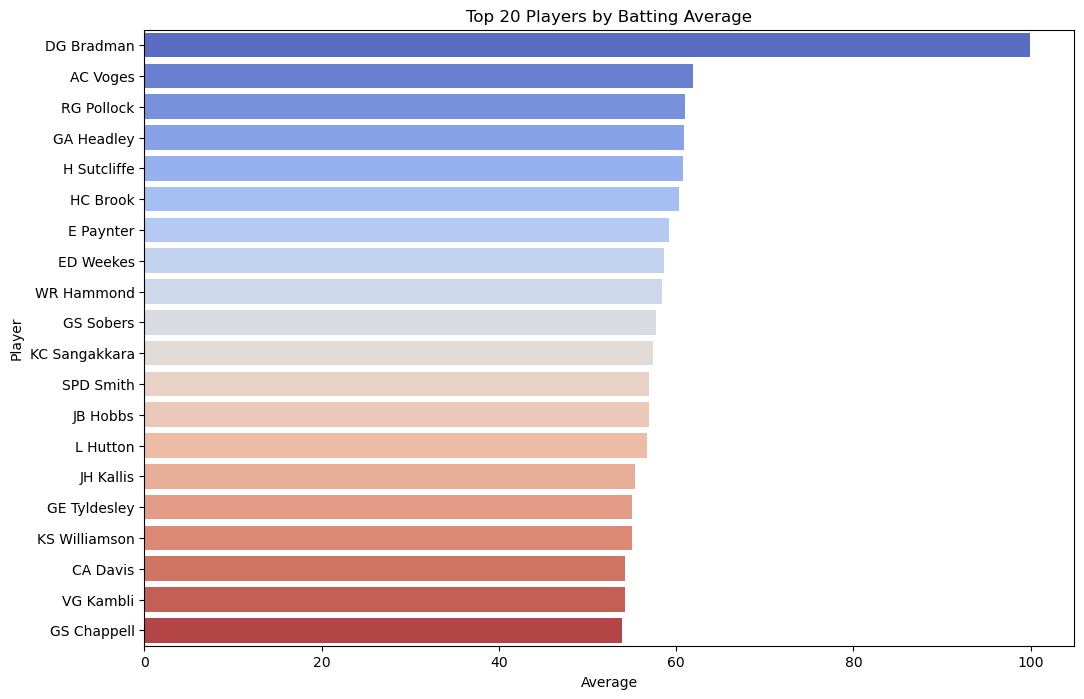

In [60]:
# Average by Player
plt.figure(figsize=(12, 8))
sns.barplot(x='Ave', y='Name', data=df.sort_values('Ave', ascending=False).head(20), palette='coolwarm')
plt.title('Top 20 Players by Batting Average')
plt.xlabel('Average')
plt.ylabel('Player')
plt.show()

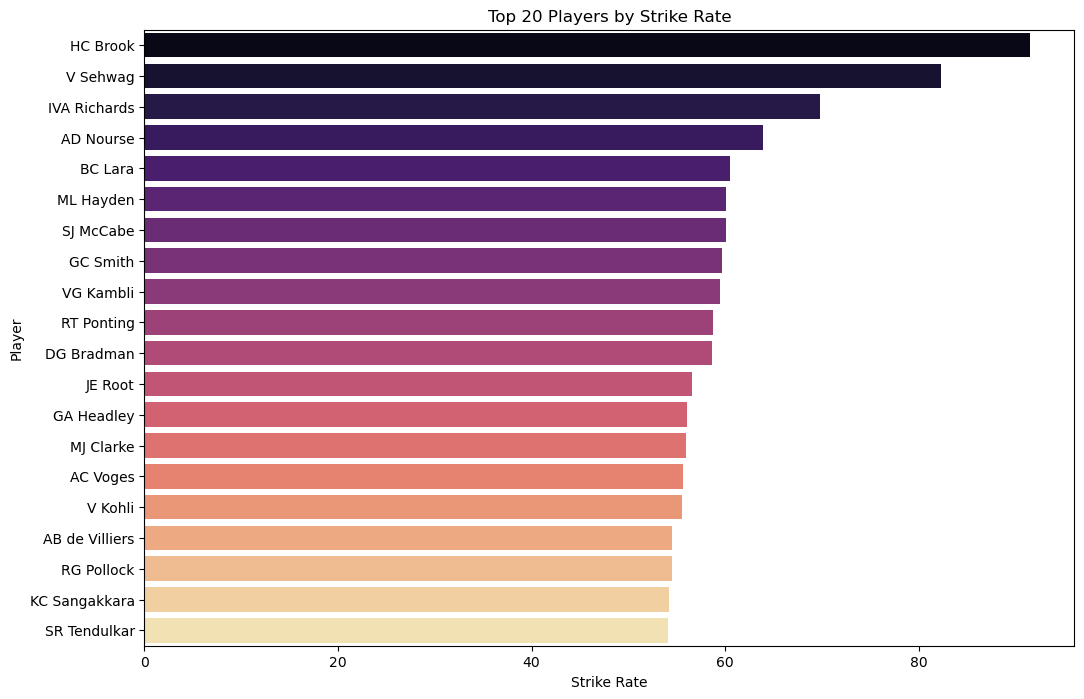

In [61]:
# Strike Rate by Player
plt.figure(figsize=(12, 8))
sns.barplot(x='Strike_Rate', y='Name', data=df.sort_values('Strike_Rate', ascending=False).head(20), palette='magma')
plt.title('Top 20 Players by Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Player')
plt.show()

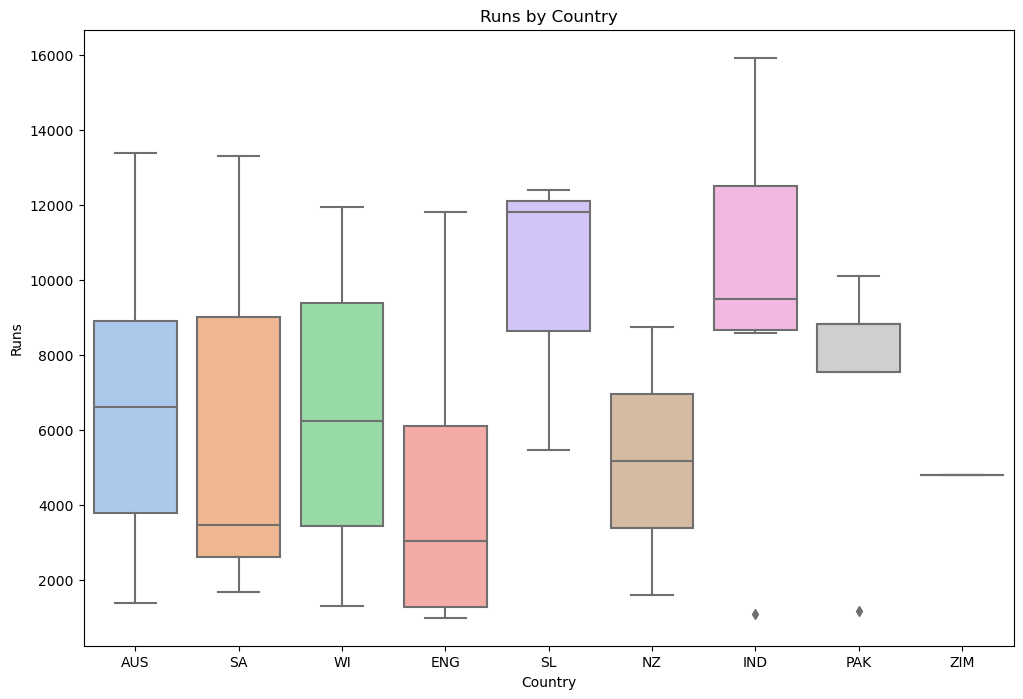

In [62]:
# Runs by Country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Runs', data=df, palette='pastel')
plt.title('Runs by Country')
plt.xlabel('Country')
plt.ylabel('Runs')
plt.show()

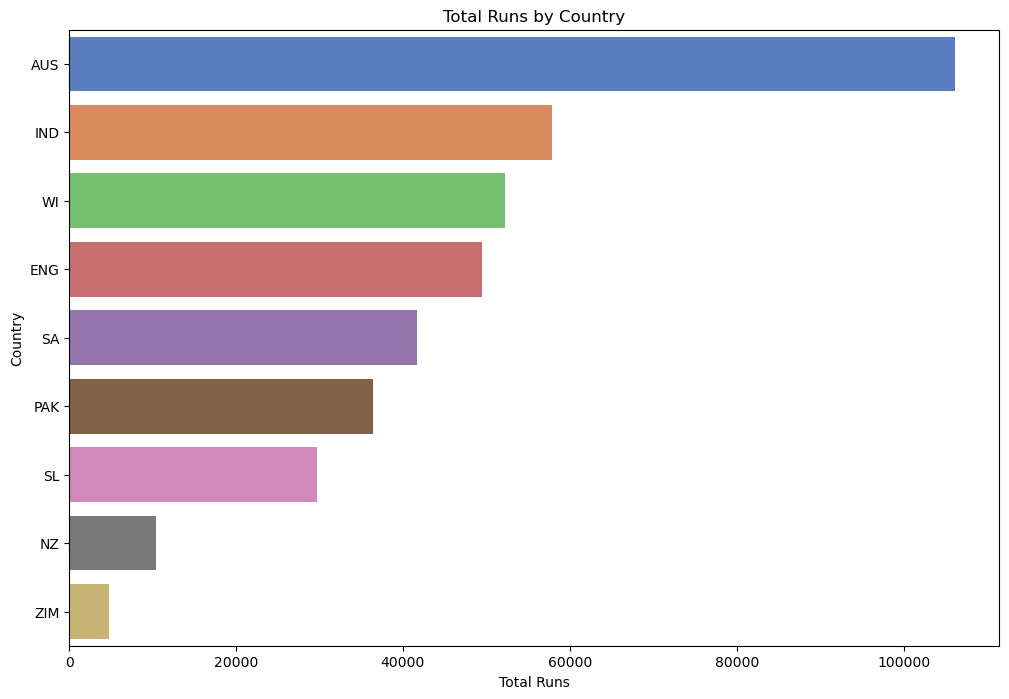

In [63]:
# Total Runs by Country
plt.figure(figsize=(12, 8))
total_runs_by_country = df.groupby('Country')['Runs'].sum().reset_index().sort_values('Runs', ascending=False)
sns.barplot(x='Runs', y='Country', data=total_runs_by_country, palette='muted')
plt.title('Total Runs by Country')
plt.xlabel('Total Runs')
plt.ylabel('Country')
plt.show()

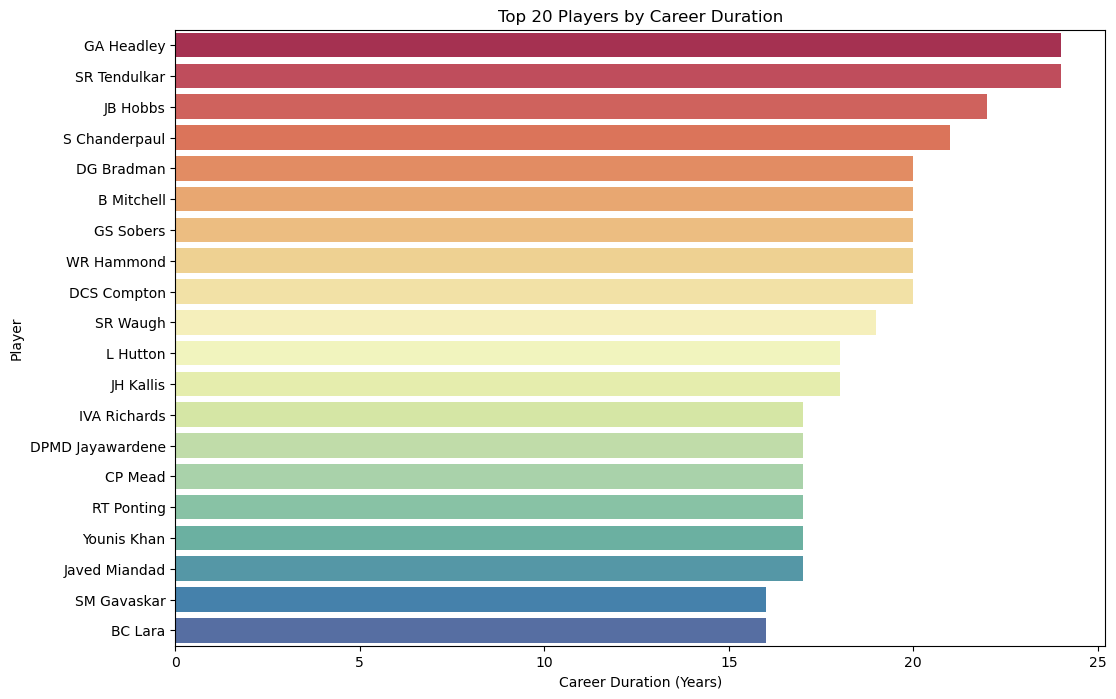

In [64]:
# Career Timeline for Players
plt.figure(figsize=(12, 8))
df['Career_Duration'] = df['Final_Year'] - df['Career_Start_Year']
sns.barplot(x='Career_Duration', y='Name', data=df.sort_values('Career_Duration', ascending=False).head(20), palette='Spectral')
plt.title('Top 20 Players by Career Duration')
plt.xlabel('Career Duration (Years)')
plt.ylabel('Player')
plt.show()

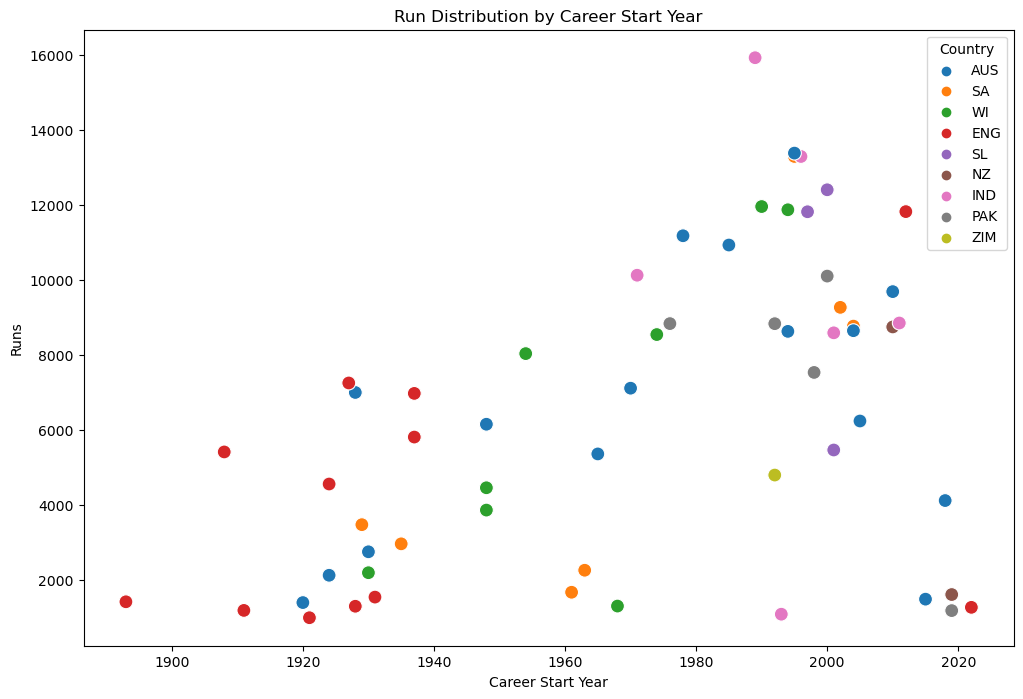

In [65]:
# Run Distribution by Career Start Year
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Career_Start_Year', y='Runs', data=df, hue='Country', palette='tab10', s=100)
plt.title('Run Distribution by Career Start Year')
plt.xlabel('Career Start Year')
plt.ylabel('Runs')
plt.show()

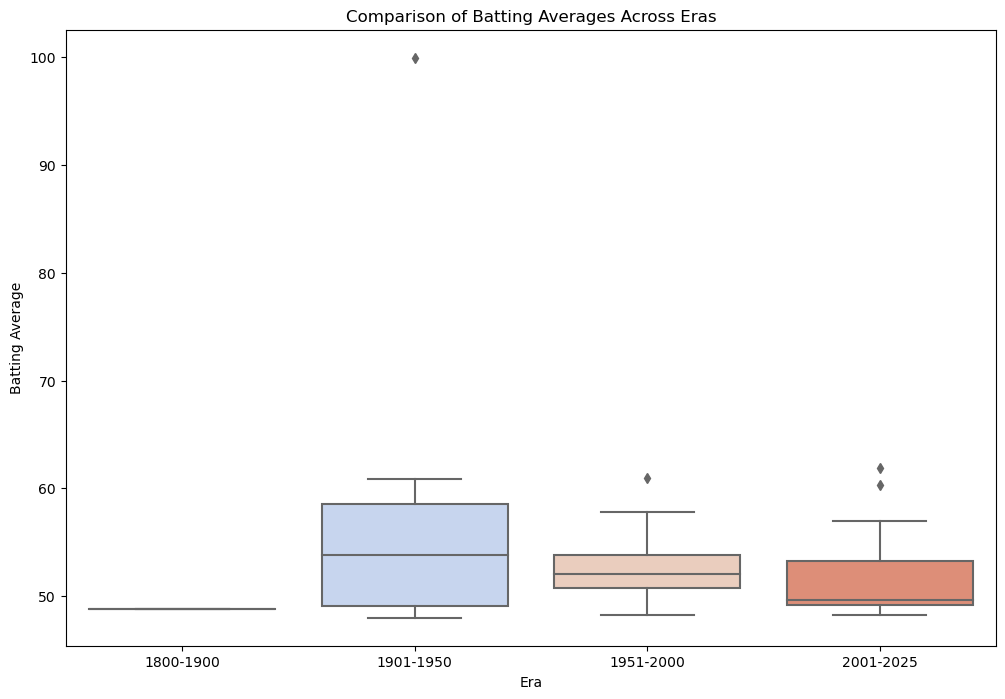

In [66]:
# Comparison of Batting Averages Across Eras
plt.figure(figsize=(12, 8))
df['Era'] = pd.cut(df['Career_Start_Year'], bins=[1800, 1900, 1950, 2000, 2025], labels=['1800-1900', '1901-1950', '1951-2000', '2001-2025'])
sns.boxplot(x='Era', y='Ave', data=df, palette='coolwarm')
plt.title('Comparison of Batting Averages Across Eras')
plt.xlabel('Era')
plt.ylabel('Batting Average')
plt.show()

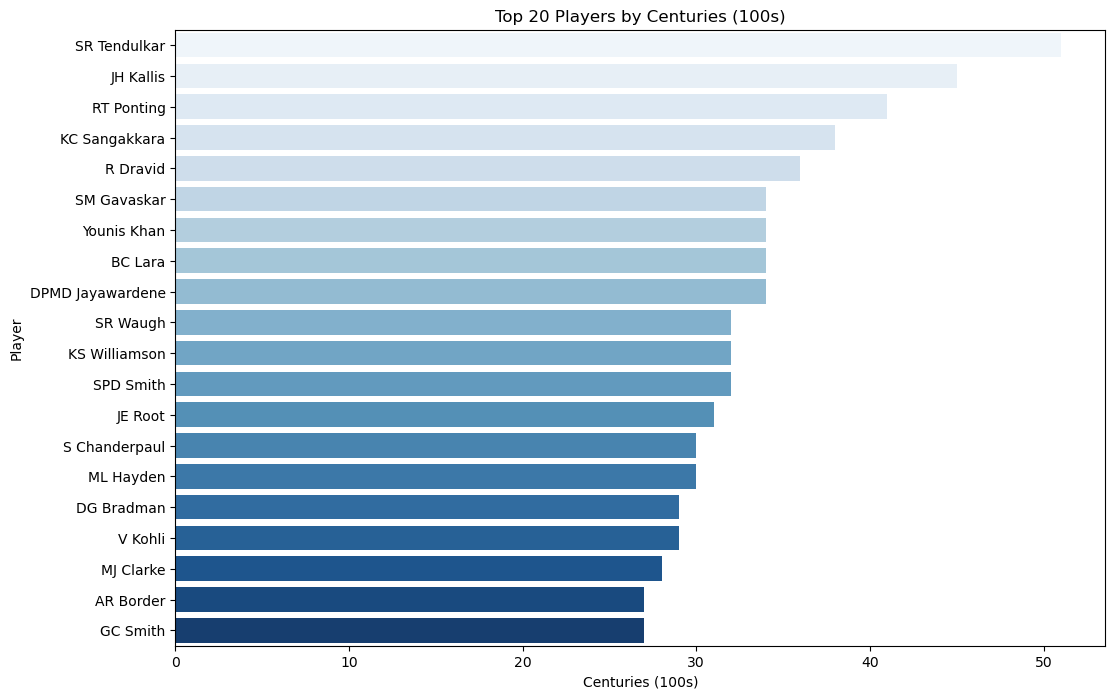

In [67]:
# Top Players by 100s
plt.figure(figsize=(12, 8))
sns.barplot(x='100', y='Name', data=df.sort_values('100', ascending=False).head(20), palette='Blues')
plt.title('Top 20 Players by Centuries (100s)')
plt.xlabel('Centuries (100s)')
plt.ylabel('Player')
plt.show()

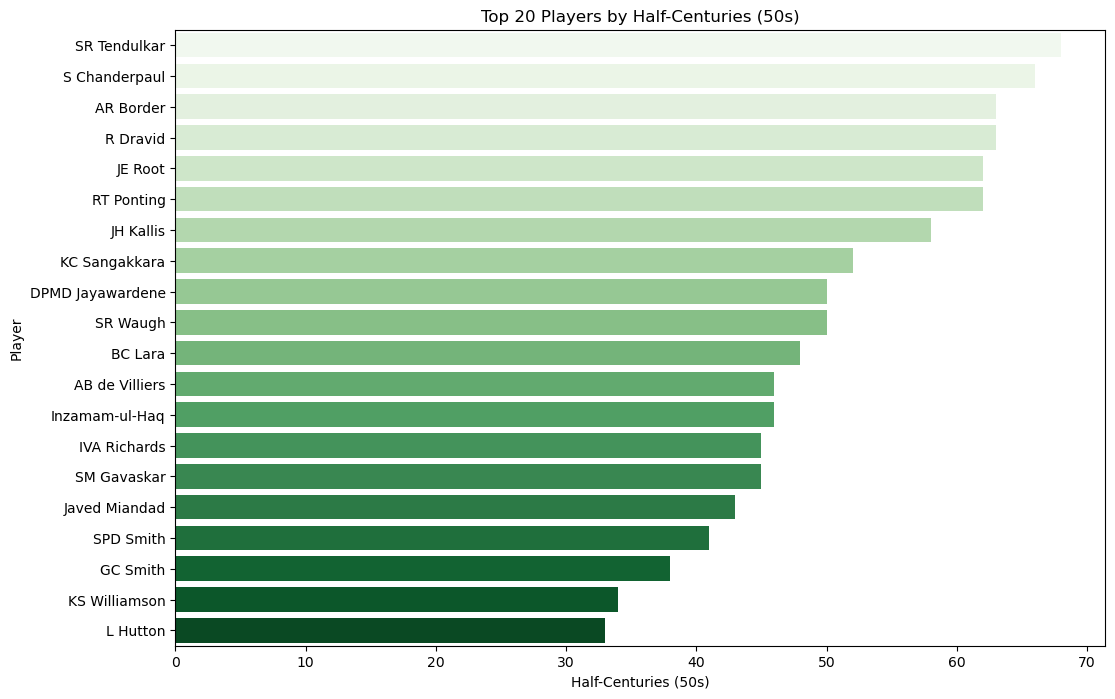

In [68]:
# Top Players by 50s
plt.figure(figsize=(12, 8))
sns.barplot(x='50', y='Name', data=df.sort_values('50', ascending=False).head(20), palette='Greens')
plt.title('Top 20 Players by Half-Centuries (50s)')
plt.xlabel('Half-Centuries (50s)')
plt.ylabel('Player')
plt.show()

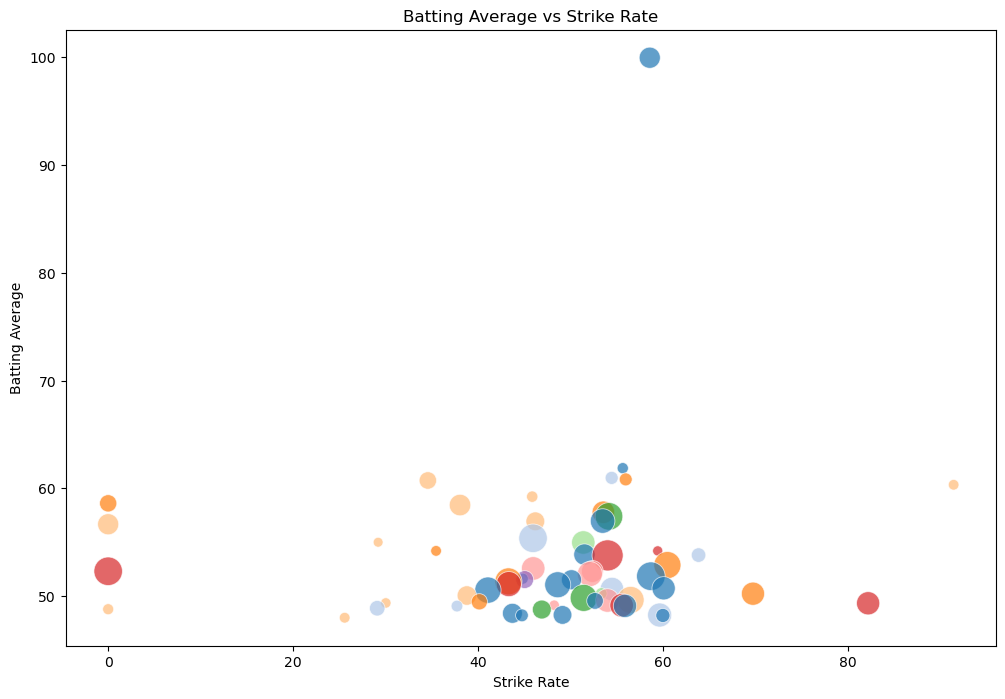

In [69]:
# Batting Average vs Strike Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Strike_Rate', y='Ave', hue='Country', size='Runs', data=df, sizes=(50, 500), alpha=0.7, palette='tab20', legend=False)
plt.title('Batting Average vs Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.show()

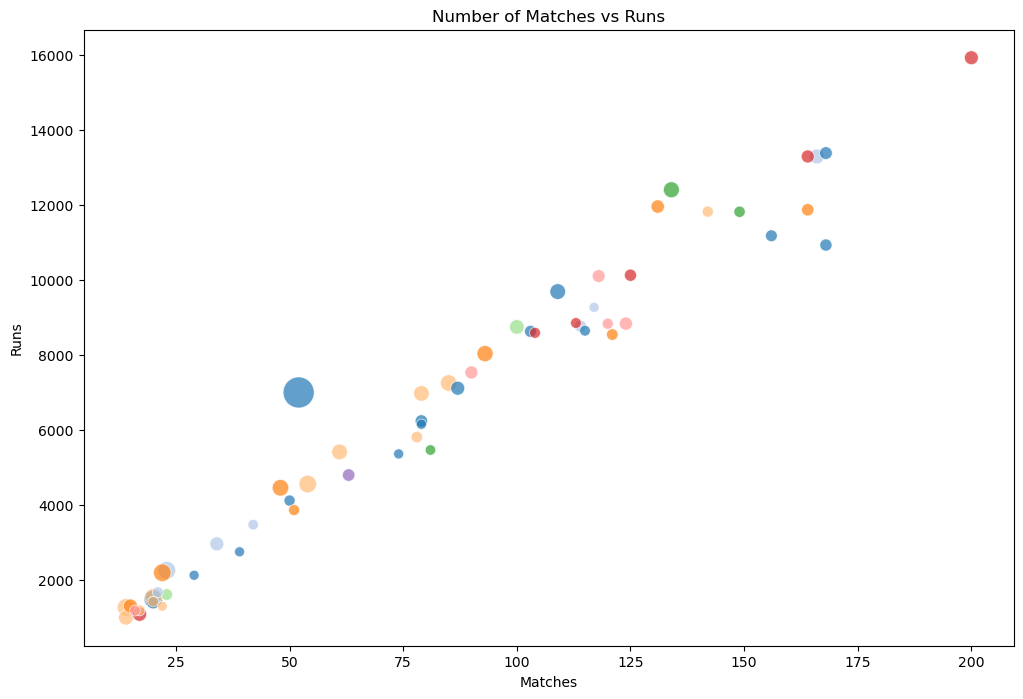

In [70]:
# Number of Matches vs Runs
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Matches', y='Runs', hue='Country', size='Ave', data=df, sizes=(50, 500), alpha=0.7, palette='tab20', legend=False)
plt.title('Number of Matches vs Runs')
plt.xlabel('Matches')
plt.ylabel('Runs')
plt.show()